In [2]:
import sys 
import os

import networkx as nx
import percolate
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from pprint import pprint
from cycler import cycler
import matplotlib as mpl

In [ ]:
from importlib import reload
reload(percolate)

In [2]:
# configure plotting
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, 'figure.figsize': (10, 5), 'font.size': 12, 'figure.facecolor': (1, 1, 1, 0)}
%matplotlib inline

In [3]:
# configure plotting colors
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#0e5a94',
    '#eb008a',
    '#37b349',
    '#f29333',
    '#00aabb',
    '#b31e8d',
    '#f8ca12',
    '#7a2d00'])

In [ ]:
# Generate linear chain graph with auxiliary nodes for spanning cluster detection
chain = percolate.spanning_1d_chain(length=10)

{'n': 0, 'N': 10, 'M': 9, 'max_cluster_size': 1, 'moments': array([9., 9., 9., 9., 9.]), 'has_spanning_cluster': False}
{'n': 1, 'N': 10, 'M': 9, 'max_cluster_size': 2, 'moments': array([8., 8., 8., 8., 8.]), 'has_spanning_cluster': False, 'edge': (9, 10)}
{'n': 2, 'N': 10, 'M': 9, 'max_cluster_size': 2, 'moments': array([ 7.,  8., 10., 14., 22.]), 'has_spanning_cluster': False, 'edge': (5, 6)}
{'n': 3, 'N': 10, 'M': 9, 'max_cluster_size': 2, 'moments': array([ 6.,  8., 12., 20., 36.]), 'has_spanning_cluster': False, 'edge': (1, 2)}
{'n': 4, 'N': 10, 'M': 9, 'max_cluster_size': 3, 'moments': array([ 5.,  7., 11., 19., 35.]), 'has_spanning_cluster': False, 'edge': (8, 9)}
{'n': 5, 'N': 10, 'M': 9, 'max_cluster_size': 3, 'moments': array([ 4.,  7., 15., 37., 99.]), 'has_spanning_cluster': False, 'edge': (6, 7)}
{'n': 6, 'N': 10, 'M': 9, 'max_cluster_size': 4, 'moments': array([ 3.,  6., 14., 36., 98.]), 'has_spanning_cluster': False, 'edge': (4, 5)}
{'n': 7, 'N': 10, 'M': 9, 'max_cluster

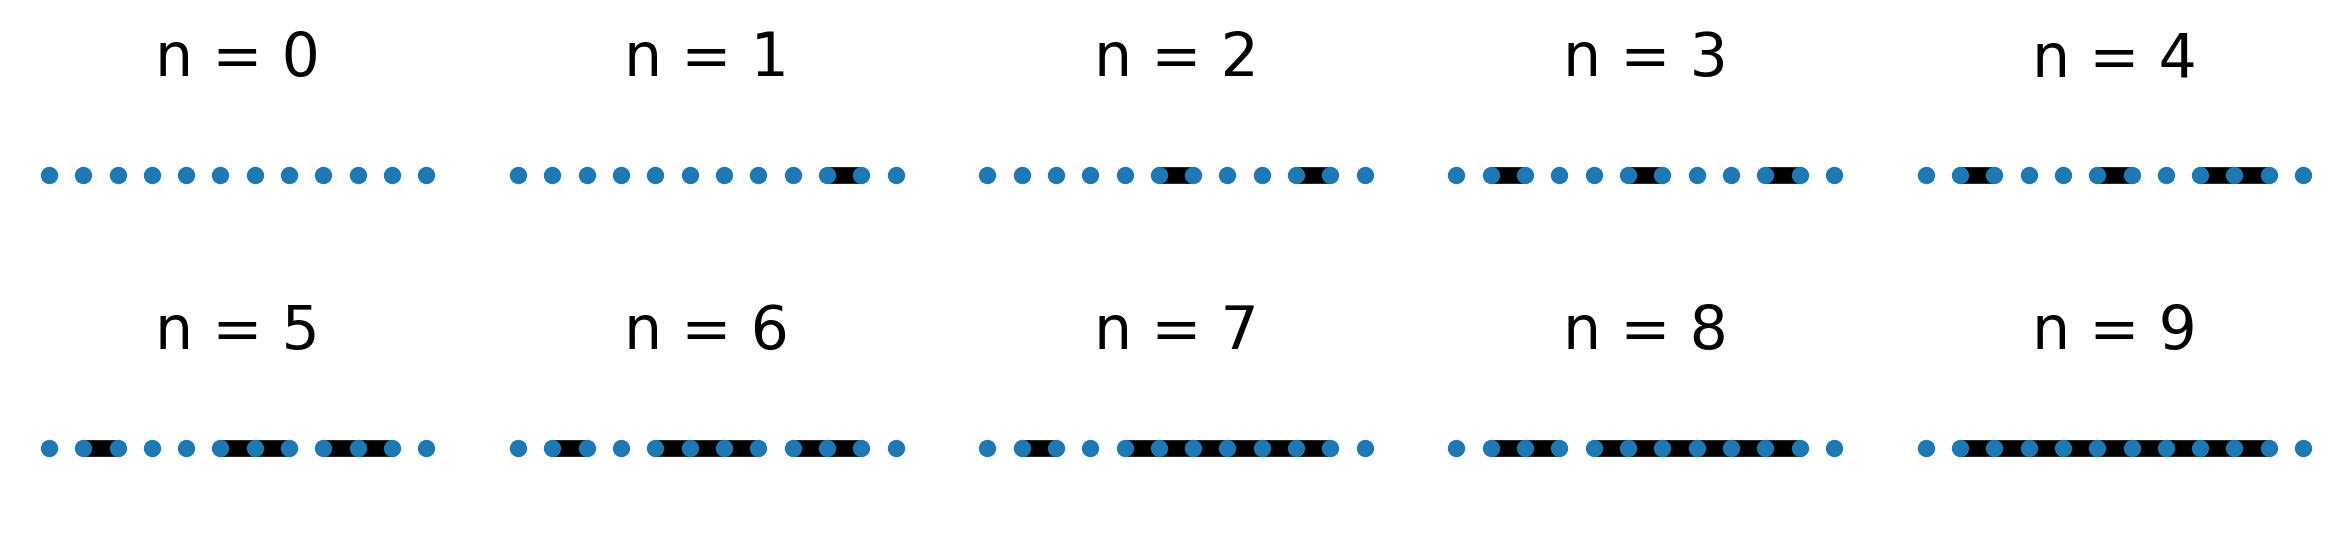

In [ ]:
# Evolve sample state and plot it at the same time
edges = list()
fig, axes = plt.subplots(figsize=(8.0, 2.0), ncols=5, nrows=2, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(chain)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
    nx.draw(
        chain,
        ax=axes[i],
        edgelist=edges,
        width=4,
        pos={node: (node, 0) for node in chain.nodes()},
        node_size=10,
    )
    axes[i].set_title('n = {}'.format(i))
    print(sample_state)
plt.tight_layout()
plt.show()

{'M': 12,
 'N': 9,
 'has_spanning_cluster': False,
 'max_cluster_size': 1,
 'moments': array([8., 8., 8., 8., 8.]),
 'n': 0}
{'M': 12,
 'N': 9,
 'edge': ((1, 0), (1, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 2,
 'moments': array([7., 7., 7., 7., 7.]),
 'n': 1}
{'M': 12,
 'N': 9,
 'edge': ((1, 1), (2, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 3,
 'moments': array([6., 6., 6., 6., 6.]),
 'n': 2}
{'M': 12,
 'N': 9,
 'edge': ((1, 1), (1, 2)),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([5., 5., 5., 5., 5.]),
 'n': 3}
{'M': 12,
 'N': 9,
 'edge': ((2, 1), (3, 1)),
 'has_spanning_cluster': True,
 'max_cluster_size': 5,
 'moments': array([4., 4., 4., 4., 4.]),
 'n': 4}
{'M': 12,
 'N': 9,
 'edge': ((3, 0), (3, 1)),
 'has_spanning_cluster': True,
 'max_cluster_size': 6,
 'moments': array([3., 3., 3., 3., 3.]),
 'n': 5}
{'M': 12,
 'N': 9,
 'edge': ((1, 2), (2, 2)),
 'has_spanning_cluster': True,
 'max_cluster_size': 7,
 'moments': arra

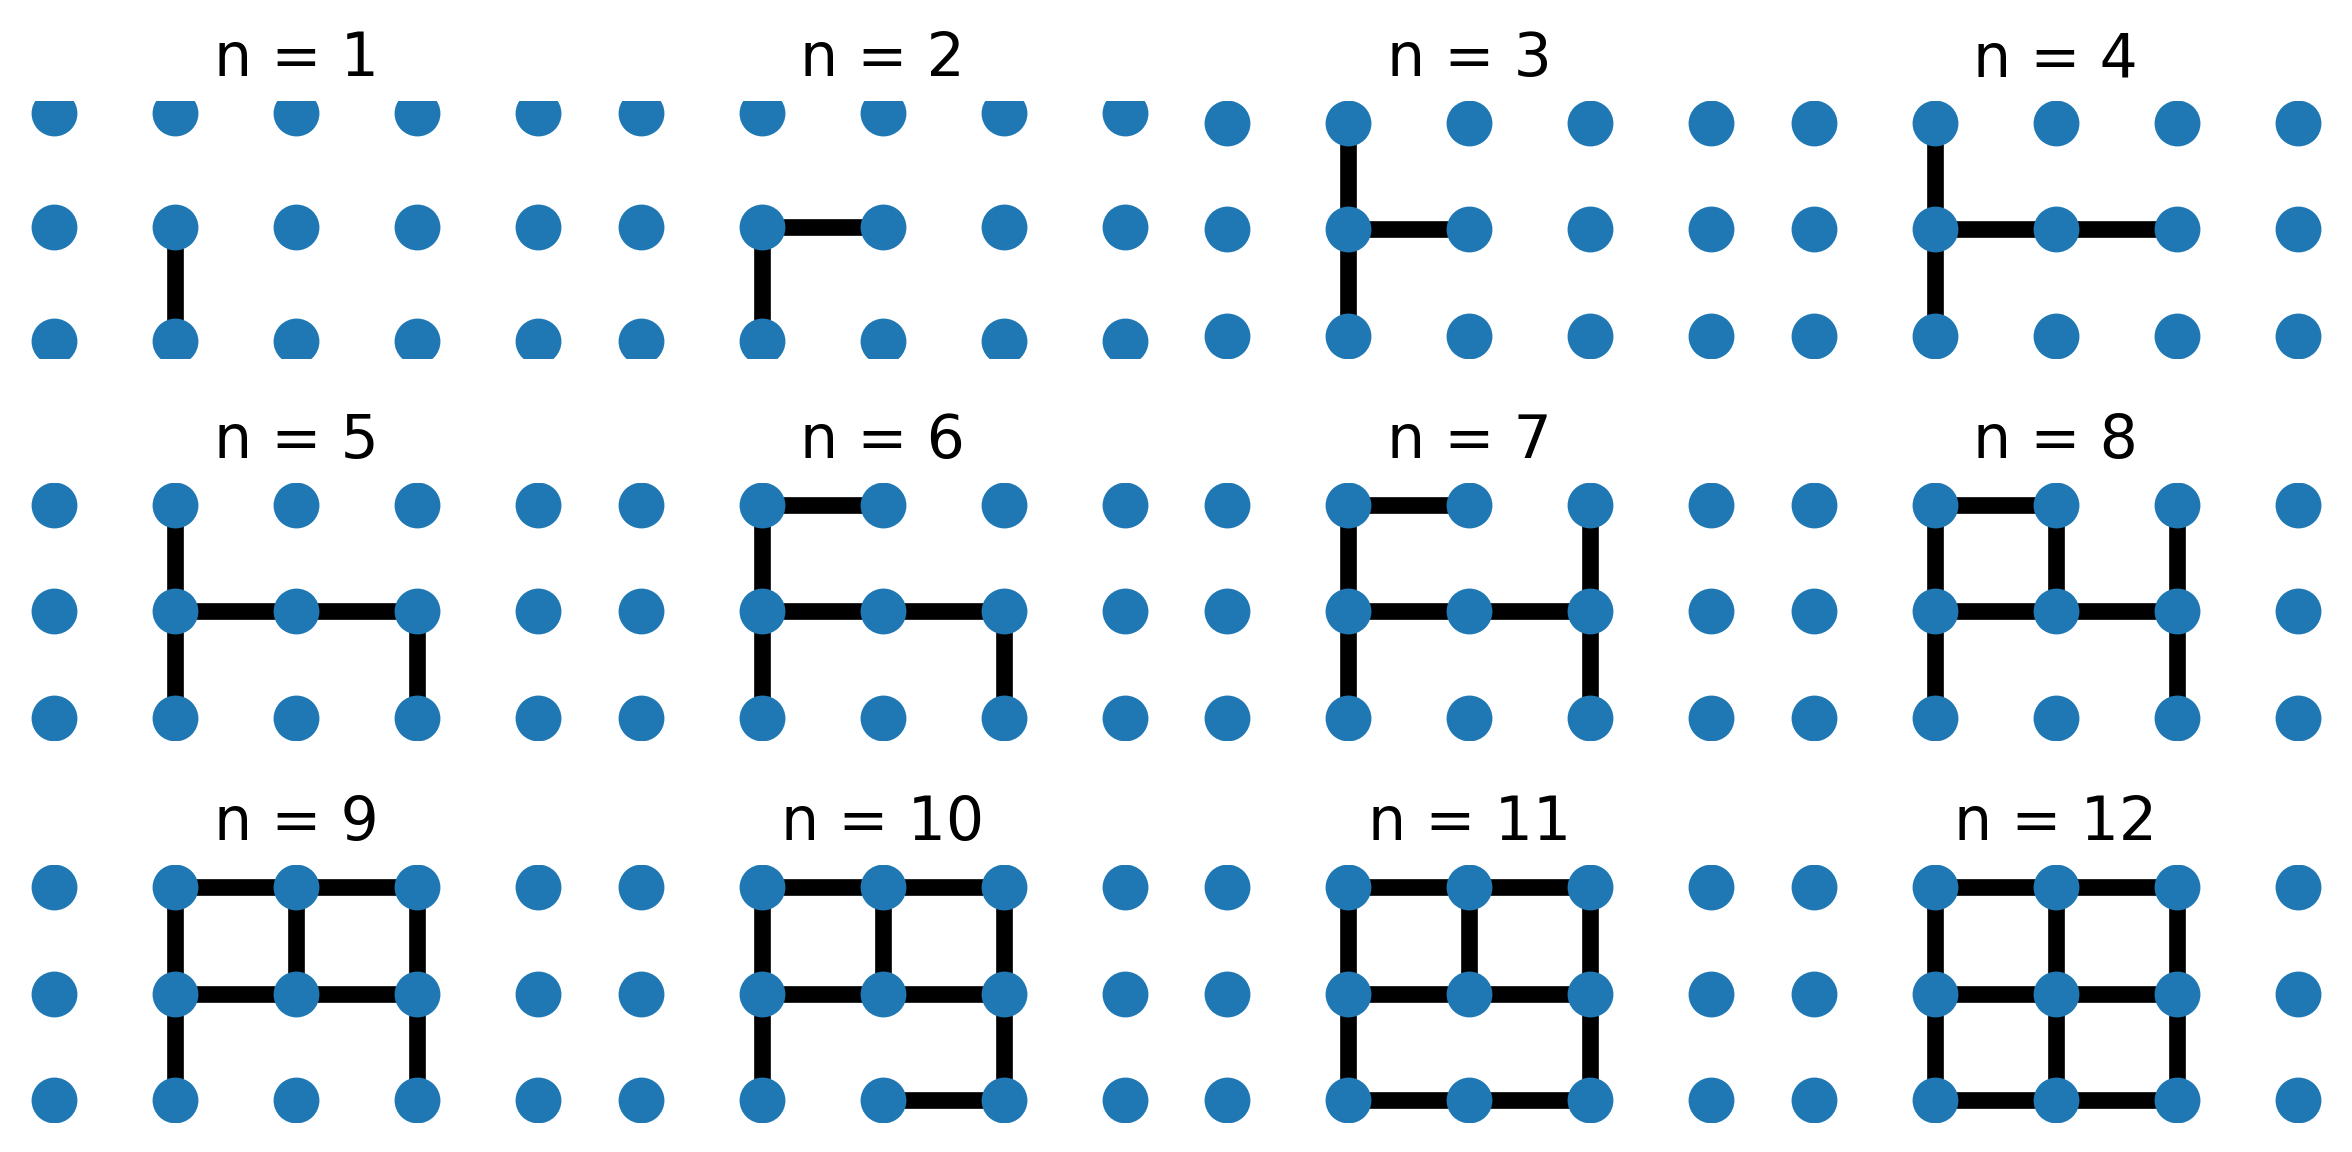

In [10]:
# Generate square grid graph with auxiliary nodes for spanning cluster detection
grid = percolate.spanning_2d_grid(3)
# Evolve sample state and plot it at the same time
edges = list()
fig, axes = plt.subplots(figsize=(8.0, 4.0), ncols=4, nrows=3, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(grid)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
        nx.draw(
            grid,
            ax=axes[i - 1],
            edgelist=edges,
            width=4,
            pos={node: node for node in grid.nodes()},
            node_size=100,
        )
        axes[i - 1].set_title('n = {}'.format(i))
    pprint(sample_state)
plt.tight_layout()
plt.show()

In [3]:
# number of parallel runs (sample states to evolve)
runs = 4

In [8]:
# system sizes
chain_ls = [10, 100, 1000] #, 10000]

# generate the linear chain graphs with spanning cluster detection
# for all system sizes
chain_graphs = [ percolate.spanning_1d_chain(l) for l in chain_ls ]


In [9]:

# compute the single-run cluster statistics for all sample states
# and system sizes
chain_single_runs = [
    [ percolate.single_run_arrays(graph=chain_graph) for _ in range(runs) ]
    for chain_graph in chain_graphs
]


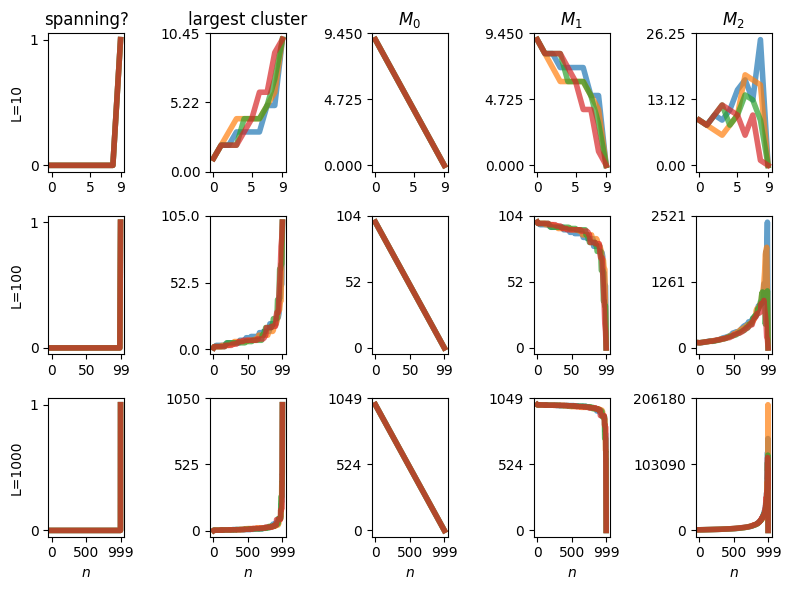

In [10]:

# plot
fig, axes = plt.subplots(
    nrows=len(chain_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(chain_ls):
    for single_run in chain_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )

    axes[l_index, 0].set_ylabel(r'L={}'.format(l))

    for ax in axes[l_index, :]:
        num_edges = chain_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=1.05 * num_edges)
        ax.set_xticks([0, l / 2, l - 1])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

    axes[l_index, 0].set_yticks([0, 1])

axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')

plt.tight_layout()
plt.show()

In [11]:
# clear memory
del chain_single_runs

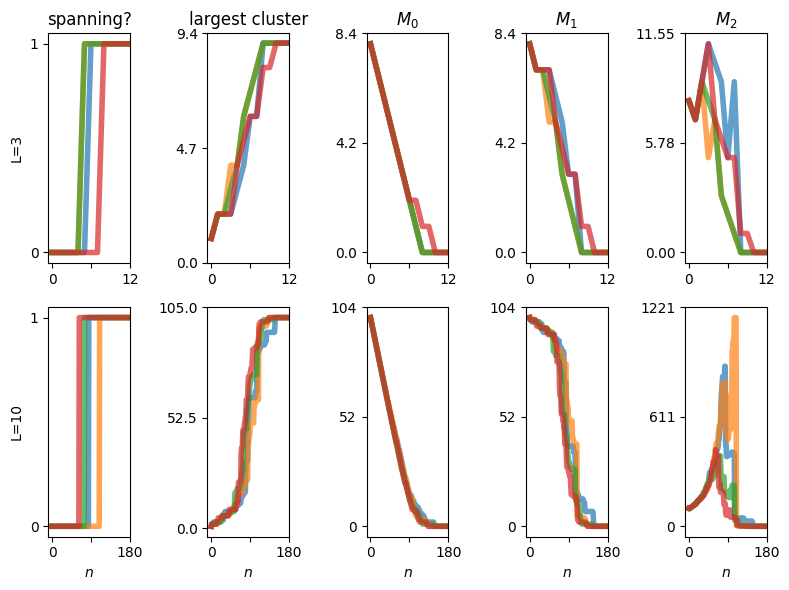

In [12]:
# system sizes
grid_ls = [3, 10] #, 32, 100, 316]
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]
# compute the single-run cluster statistics for all sample states
# and system sizes
grid_single_runs = [
    [ percolate.single_run_arrays(graph=grid_graph) for _ in range(runs) ]
    for grid_graph in grid_graphs
]
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    for single_run in grid_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )

    axes[l_index, 0].set_ylabel(r'L={}'.format(l))

    for ax in axes[l_index, :]:
        num_edges = grid_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_xticklabels(['0', '', num_edges])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

    axes[l_index, 0].set_yticks([0, 1])

axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')

plt.tight_layout()
plt.show()